The data for this project features two time series (the historical stock price of Coca Cola Consolidated ltd. and the historical stock price of Pepsi Co.) through the years of 2010-2022.  The data featured is monthly and has been extracted from Yahoo Finance.

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import STL
import seaborn as sns
import pmdarima as pm
from statsmodels.tsa.api import VAR
import itertools
import altair as alt
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations
import yfinance as yf

In [16]:
## importing datasets

In [17]:
coke = yf.download("KO",start="2010-01-01", end="2022-10-01")[["Adj Close"]]
coke = coke.rename(columns={'Adj Close': 'coke'})
coke = coke.resample('M').mean()

[*********************100%***********************]  1 of 1 completed


In [18]:
pepsi = yf.download("PEP",start="2010-01-01", end="2022-10-01")[["Adj Close"]]
pepsi = pepsi.rename(columns={'Adj Close': 'pepsi'})
pepsi = pepsi.resample('M').mean()

[*********************100%***********************]  1 of 1 completed


In [19]:
coke = coke.dropna()
pepsi = pepsi.dropna()

In [20]:
# calculate returns 
coke = coke.pct_change()
pepsi= pepsi.pct_change()

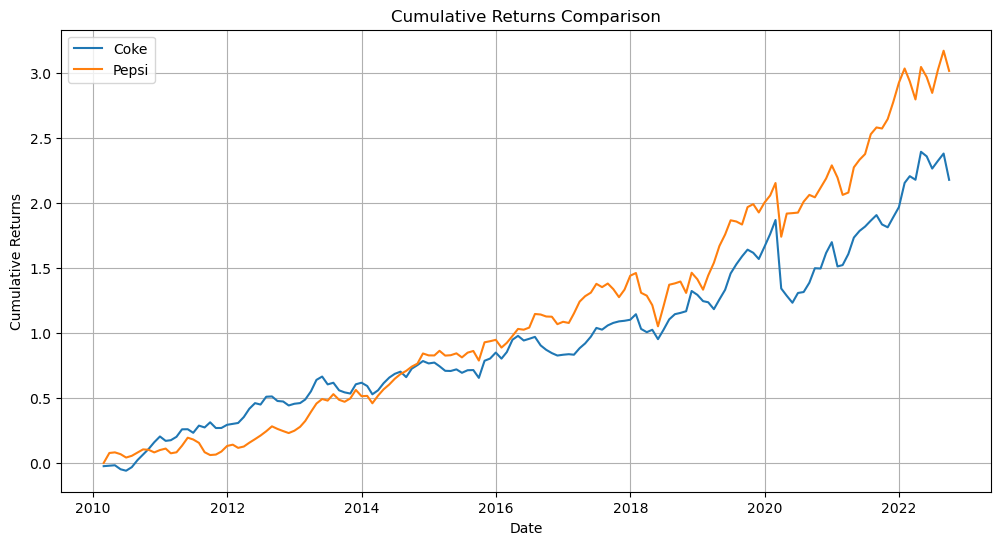

In [21]:
import matplotlib.pyplot as plt

# Calculate cumulative returns
coke = (1 + coke).cumprod() - 1
pepsi = (1 + pepsi).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(coke.index, coke, label='Coke')
plt.plot(pepsi.index, pepsi, label='Pepsi')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
pepsi = pepsi.dropna()
coke = coke.dropna()

In [23]:
##checking if they are cointegrated

In [24]:
 from statsmodels.tsa.stattools import coint

# Perform the Engle-Granger cointegration test
result = coint(coke, pepsi)

# Extract the p-value from the test result
p_value = result[1]

# Check if the series are cointegrated (p-value less than a threshold, e.g., 0.05)
if p_value < 0.05:
    print("The series are likely cointegrated.")
else:
    print("The series are not cointegrated.")

The series are likely cointegrated.


In [25]:
#Produce a time-series plot of your data including the respective ACF and PACF plots. - for coke

/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


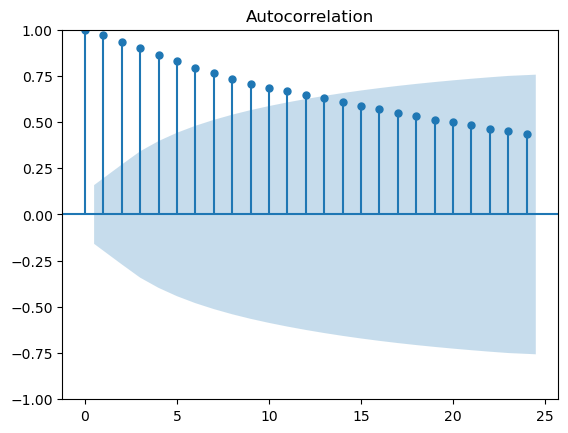

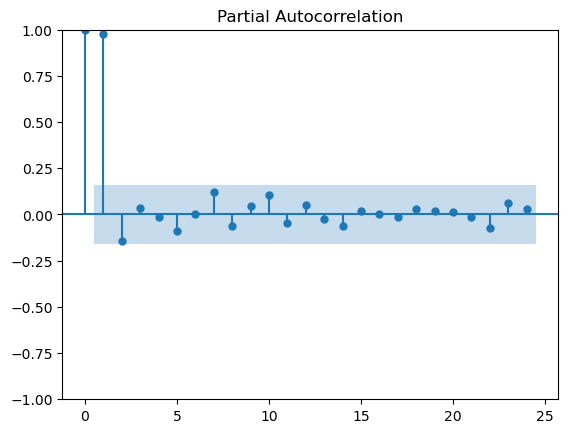

In [26]:
plot_acf(coke , lags = 24);
plot_pacf(coke, lags = 24);

Produce a time-series plot of your data including the respective ACF and PACF plots. - for Pepsi

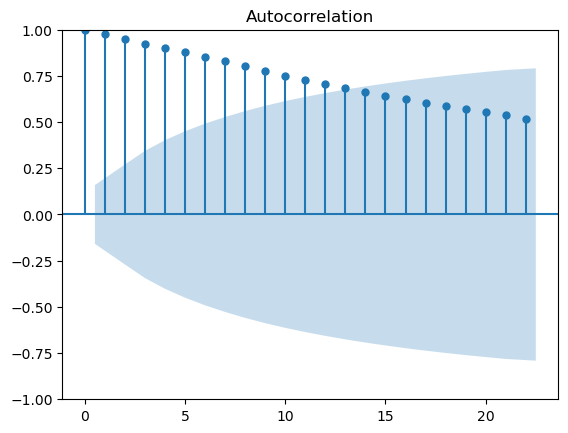

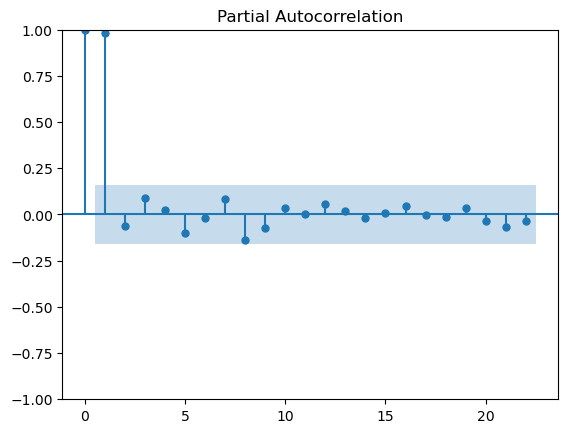

In [27]:
plot_acf(pepsi);
plot_pacf(pepsi);

#(b) Plot the stl decomposition plot of the data, and discuss the results.

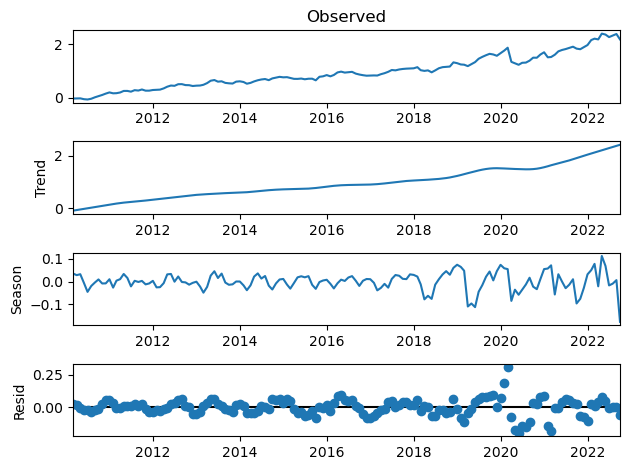

In [28]:
stl= STL(coke)
results = stl.fit()
fig = results.plot()

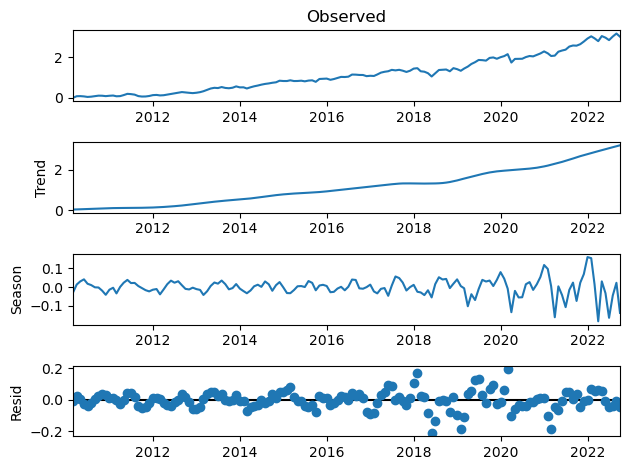

In [29]:
stl= STL(pepsi)
results = stl.fit()
fig = results.plot()

We have attemped decomposition through stl . The graph indicate an upward trend for the both the share prices of coca cola and pepsi co.

In [30]:
#(c) Fit a model that includes, trend, seasonality and cyclical components (not from auto.arima). 
#Make sure to discuss your model in detail.

In [31]:
#created model through visual inspection for Coke

In [32]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(coke, order=(1,0,0),seasonal_order = (1,0,1,12))
model1_fit = model.fit()
print(model1_fit.summary())

/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                               coke   No. Observations:                  152
Model:             ARIMA(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 176.825
Date:                            Tue, 18 Jul 2023   AIC                           -343.650
Time:                                    23:37:10   BIC                           -328.531
Sample:                                02-28-2010   HQIC                          -337.508
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0623      1.160      0.916      0.360      -1.211       3.336
ar.L1          0.9971      0.014   

/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
#created model through visual inspection for Pepsi
# fit model
model2 = ARIMA(pepsi, order=(1,0,0),seasonal_order = (1,0,1,12))
model2_fit = model2.fit()
print(model2_fit.summary())

/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                              pepsi   No. Observations:                  152
Model:             ARIMA(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 165.942
Date:                            Tue, 18 Jul 2023   AIC                           -321.884
Time:                                    23:37:10   BIC                           -306.765
Sample:                                02-28-2010   HQIC                          -315.742
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6706      2.156      0.775      0.438      -2.554       5.895
ar.L1          0.9970      0.013   

/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


By observing the ACF and PACF plots of the data, we fit a Seasonal AR(1) process to the data of coca cola and a seasonal AR(1) process to the pepsi data. The lags of 1 and 1 respectively and no presence of an MA process is mainly concluded from the ACF & PACF plots and the presence of heavy seasonality has already been discussed.  The lags are all significant except for the 2nd AR lag on Coke indicaating it is nicely fit.

In [34]:
#(d) Plot the respective residuals vs. fitted values and discuss your observations.

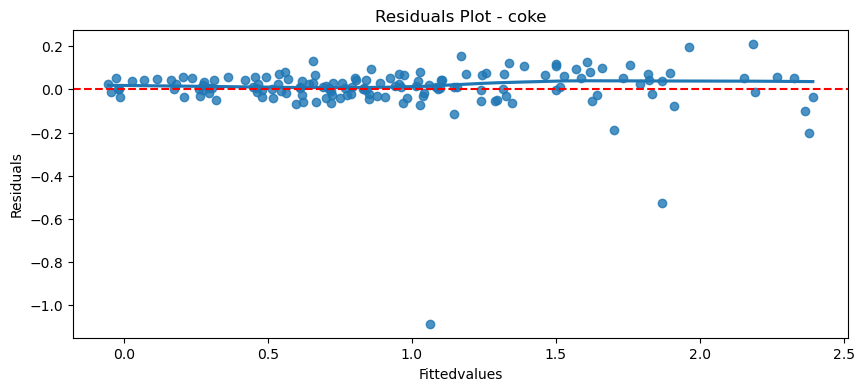

In [35]:
fitted_values = model1_fit.fittedvalues
residuals1 = model1_fit.resid

plt.figure(figsize = (10, 4))
sns.regplot(x = fitted_values, y = residuals1, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.xlabel("Fittedvalues")
plt.title("Residuals Plot - coke")
plt.show()

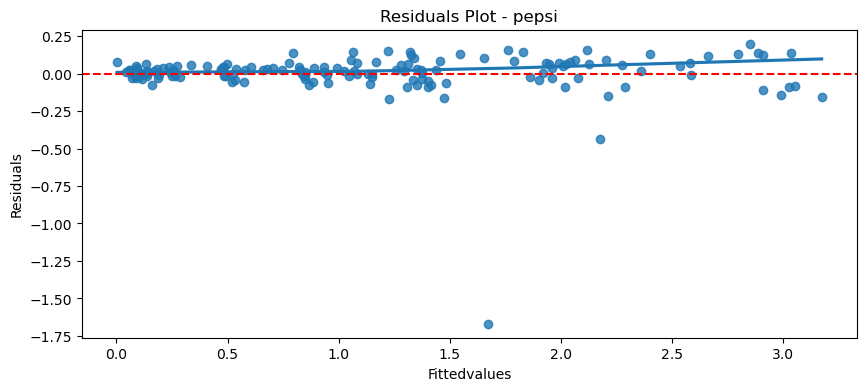

In [36]:
fitted_values = model2_fit.fittedvalues
residuals2 = model2_fit.resid

plt.figure(figsize = (10, 4))
sns.regplot(x = fitted_values, y = residuals2, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.xlabel("Fittedvalues")
plt.title("Residuals Plot - pepsi")
plt.show()

In both the models, except a few outliers, the residuals are centered around zero and seem to have a constant variance. This indicates that the residuals have an approximately normal distribution.  

In [37]:
#(e) Plot the ACF and PACF of the respective residuals and interpret the plots.

/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


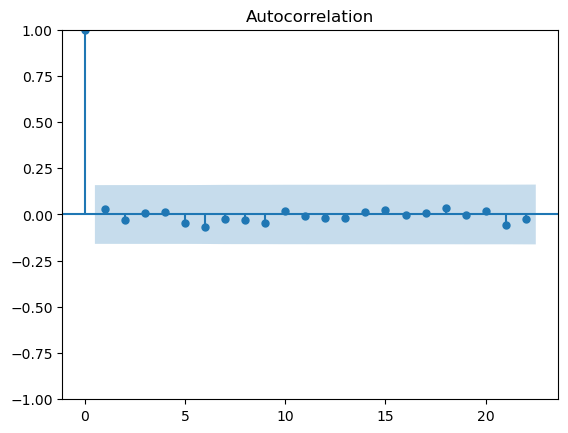

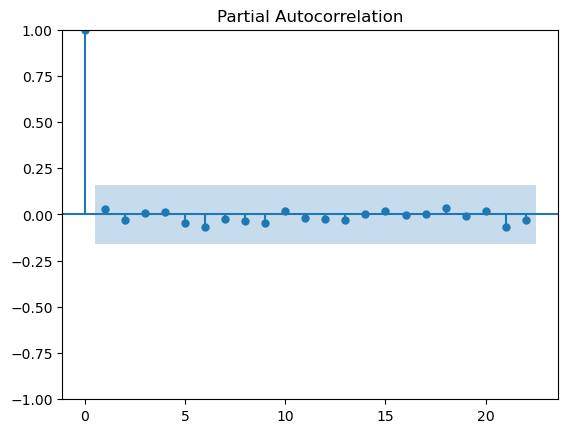

In [38]:
plot_acf(residuals1);
plot_pacf(residuals1);

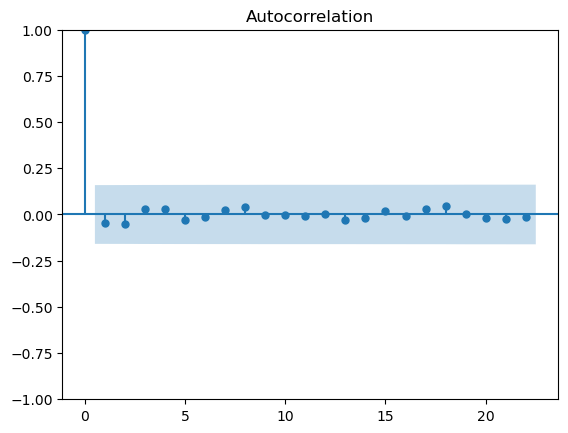

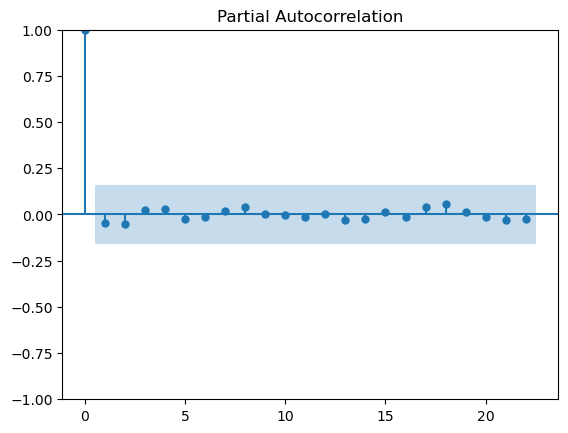

In [39]:
plot_acf(residuals2);
plot_pacf(residuals2);

After observing both ACF and PACF plots, we can see that the residuals are not autocorrelated and follow no AR process. This further implies that the model is well fitted and there is no problem of autocorrelation now. 

plotting forecasts

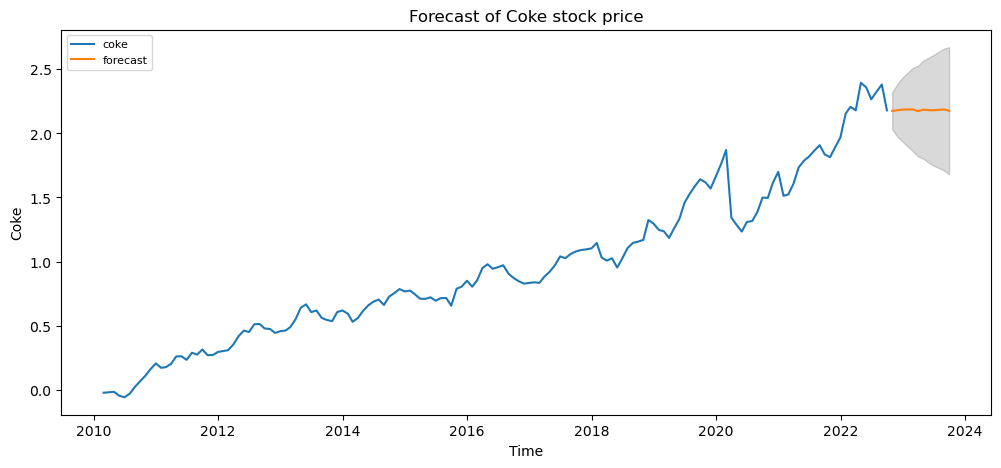

In [40]:
fc = model1_fit.forecast(12, alpha=0.05) 
fc_series = pd.Series(fc)
lower_series = model1_fit.get_forecast(12).conf_int()["lower coke"]
upper_series = model1_fit.get_forecast(12).conf_int()["upper coke"]
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(coke, label='coke')

plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast of Coke stock price')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Time')
plt.ylabel('Coke')
plt.show()

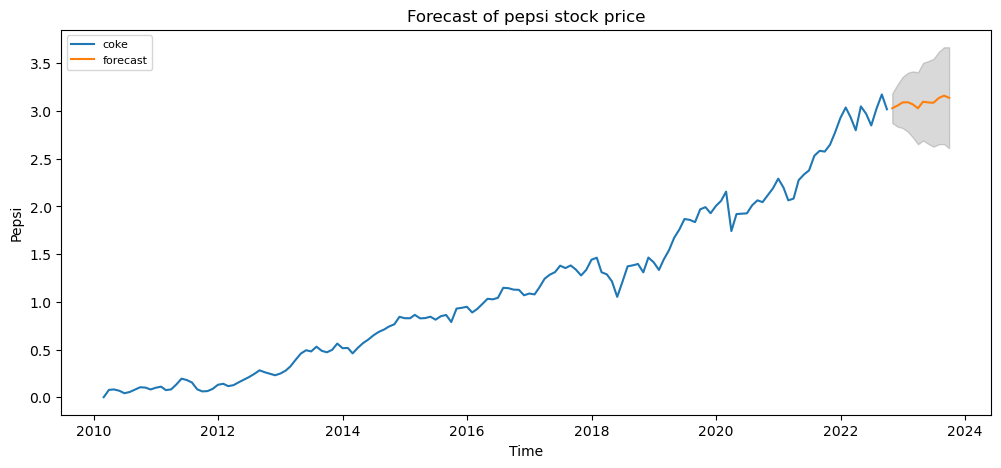

In [41]:
fc = model2_fit.forecast(12, alpha=0.05) 
fc_series = pd.Series(fc)
lower_series = model2_fit.get_forecast(12).conf_int()["lower pepsi"]
upper_series = model2_fit.get_forecast(12).conf_int()["upper pepsi"]
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(pepsi, label='coke')

plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast of pepsi stock price')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Time')
plt.ylabel('Pepsi')
plt.show()

### auto-arima

In [42]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(coke, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-304.232, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-67.155, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-283.161, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-199.606, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=24.184, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-248.043, Time=0.13 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-302.343, Time=0.76 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-302.187, Time=2.82 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-285.282, Time=0.44 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=5.77 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-303.277, Time=0.66 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-302.085, Time=0.88 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-302.242, Time=1.00 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-83.027, Time=0.17 sec
 ARIMA(0,0,2)(0,1,1)[12] int

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  152
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 157.116
Date:                            Tue, 18 Jul 2023   AIC                           -304.232
Time:                                    23:37:31   BIC                           -289.524
Sample:                                02-28-2010   HQIC                          -298.255
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0218      0.008      2.596      0.009       0.005       0.038
ar.L1          0.8652      0.047     18.528      0.000       0.774       0.957
ma.L1          0.1747      0.154      1.135      0.256      -0.127       0.476
ma.S.L12      -0.8430      0.071    -11.942      0.000      -0.981      -0.705
sigma2         0.0055      0.000     15.594      0.000       0.005       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1366.04
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              12.41   Skew:                            -2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

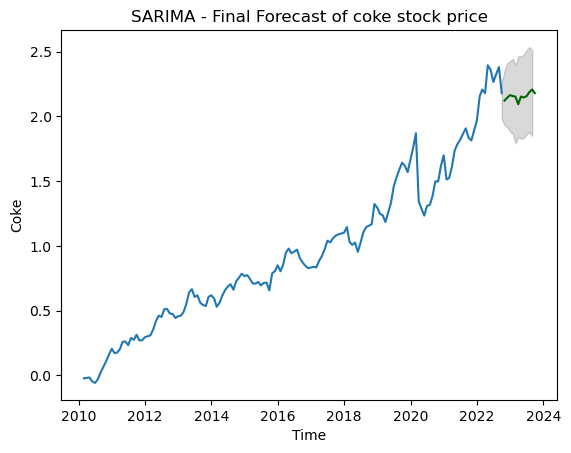

In [125]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(coke.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(coke)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of coke stock price")
plt.xlabel('Time')
plt.ylabel('Coke')
plt.show()

In [126]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(pepsi, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-286.912, Time=0.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-227.362, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-278.608, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-286.572, Time=0.23 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-224.502, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-289.133, Time=0.53 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-280.499, Time=0.21 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=-287.893, Time=1.74 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=-288.060, Time=2.40 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-288.174, Time=2.57 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-284.465, Time=0.93 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=-285.364, Time=2.79 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-288.780, Time=0.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-287.432, Time=0.33 sec
 ARIMA(2,1,1)(1,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  152
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 152.985
Date:                              Thu, 06 Jul 2023   AIC                           -293.970
Time:                                      20:39:57   BIC                           -276.363
Sample:                                  02-28-2010   HQIC                          -286.815
                                       - 09-30-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0049      0.003      1.465      0.143      -0.002       0.011
ar.L1         -0.1614      0.069     -2.340      0.019      -0.297      -0.026
ar.L2         -0.2605      0.077     -3.365      0.001      -0.412      -0.109
ar.S.L12      -0.2763      0.129     -2.140      0.032      -0.529      -0.023
ma.S.L12      -0.6257      0.137     -4.571      0.000      -0.894      -0.357
sigma2         0.0060      0.001     11.883      0.000       0.005       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               220.55
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               7.87   Skew:                            -1.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

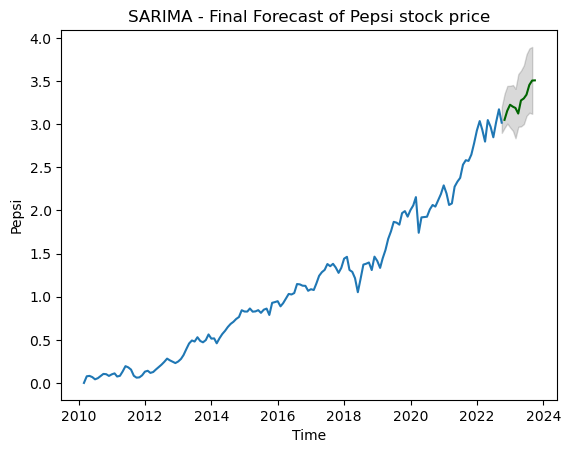

In [127]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(pepsi.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(pepsi)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Pepsi stock price")
plt.xlabel('Time')
plt.ylabel('Pepsi')
plt.show()

The autoarima models come out differently than the models we specified above. The new coke model is an ARMA(1,1) with a very different seasonal structute, while the Pepsi model stays the same at MA(1) but also changes the seasonal model. The forecasts look much more in tune with the seasonality and cyclicity the time series demonstrate.

In [128]:
train_pepsi = pepsi.iloc[:(152-12)]
test_pepsi  = pepsi.iloc[(152-12):]
predictions_pepsi = test_pepsi.copy()

In [129]:
#ets
ets_model_p=sm.tsa.statespace.ExponentialSmoothing(train_pepsi,trend=True,initialization_method="heuristic",seasonal=12,damped_trend=False).fit()
fc_model_p = ets_model_p.forecast(12)
predictions_pepsi["ETS"]=fc_model_p

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.02683D-01    |proj g|=  1.52667D-01

At iterate    5    f= -1.22109D+00    |proj g|=  1.33094D-03

At iterate   10    f= -1.22142D+00    |proj g|=  2.28038D-04
  ys=-1.162E-05  -gs= 4.048E-04 BFGS update SKIPPED

At iterate   15    f= -1.22384D+00    |proj g|=  1.77850D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     27      1     1     0   4.754D-07  -1.224D+00
  F =  -1.2238436855360000     

CONVERGENCE: NORM

/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/exponential_smoothing.py:161: RuntimeWarning: ExponentialSmoothing should not be used with seasonal terms. It has a serious bug that has not been fixed. Instead use ETSModel.
  warnings.warn(
 This problem is unconstrained.


<Figure size 1200x800 with 0 Axes>

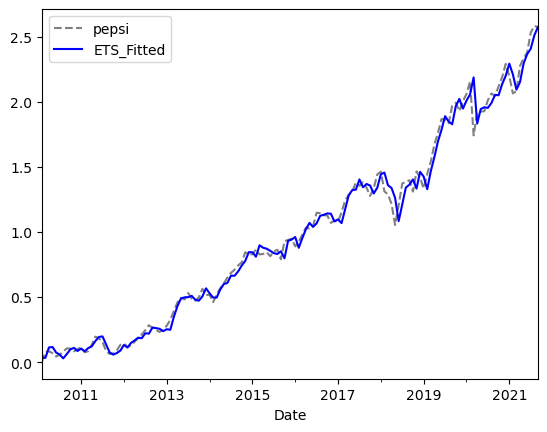

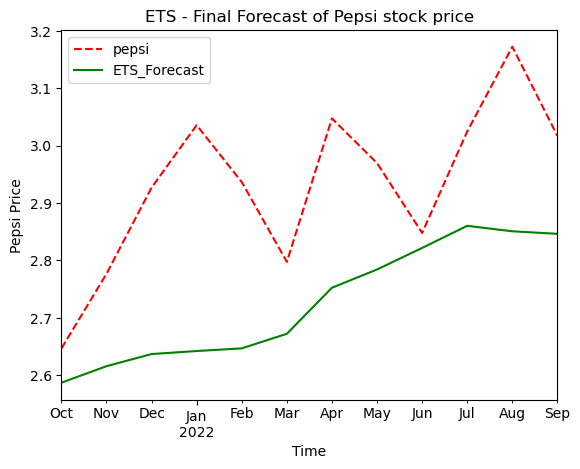

In [130]:
import matplotlib.pyplot as plt

# Plotting the training data, fitted values, test data, and forecast in a single figure
plt.figure(figsize=(12, 8))

# Plotting the training data
train_pepsi.plot(style="--", color="gray", legend=True, label="Train")

# Plotting the fitted values from the ETS model
ets_model_p.fittedvalues.plot(color="b", legend=True, label="ETS_Fitted")

# Plotting the test data
test_pepsi.plot(style="--", color="r", legend=True, label="Test")

# Plotting the forecast
predictions_pepsi["ETS"].plot(color="g", legend=True, label="ETS_Forecast")

plt.xlabel('Time')
plt.ylabel('Pepsi Price')
plt.title("ETS - Final Forecast of Pepsi stock price")
plt.show()


The ETS model does well tracking the index, but misses the forecast on the test index quite significantly.

In [131]:
ets_model_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  pepsi   No. Observations:                  140
Model:                   ETS(A, A, A)   Log Likelihood                 171.338
Date:                Thu, 06 Jul 2023   AIC                           -334.676
Time:                        20:39:58   BIC                           -322.910
Sample:                    02-28-2010   HQIC                          -329.895
                         - 09-30-2021   Scale                            0.005
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8916      0.069     12.871      0.000       0.756       1.027
smoothing_trend        0.0164      0.014      1.174      0.241      -0.011       0.044
smoothing_seasonal     0.0441      0.047      0.929      0.353      -0.049       0.137
=============================================
             initialization method: heuristic
---------------------------------------------
level                                  0.0772
trend                                  0.0045
seasonal                              -0.0152
seasonal.L1                           -0.0158
seasonal.L2                           -0.0116
seasonal.L3                           -0.0144
seasonal.L4                           -0.0071
seasonal.L5                            0.0105
seasonal.L6                            0.0412
seasonal.L7                            0.0331
seasonal.L8                            0.0371
seasonal.L9                            0.0116
seasonal.L10                          -0.0230
seasonal.L11                          -0.0465
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               801.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              11.98   Skew:                            -1.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
train_coke = coke.iloc[:(152-12)]
test_coke  = coke.iloc[(152-12):]
predictions_coke = test_coke.copy()

In [133]:
ets_model_c=sm.tsa.statespace.ExponentialSmoothing(train_coke,trend=True,initialization_method="heuristic",seasonal=12,damped_trend=False).fit()
fc_model_c = ets_model_c.forecast(12)
predictions_coke["ETS"]= fc_model_c

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.47579D-01    |proj g|=  6.11215D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      4      1     0     0   4.170D-08  -1.217D+00
  F =  -1.2169662321484347     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/exponential_smoothing.py:161: RuntimeWarning: ExponentialSmoothing should not be used with seasonal terms. It has a serious bug that has not been fixed. Instead use ETSModel.
  warnings.warn(
 This problem is unconstrained.


<AxesSubplot:title={'center':'ETS - Final Forecast of Coke stock price'}, xlabel='Date', ylabel='Coke Price'>

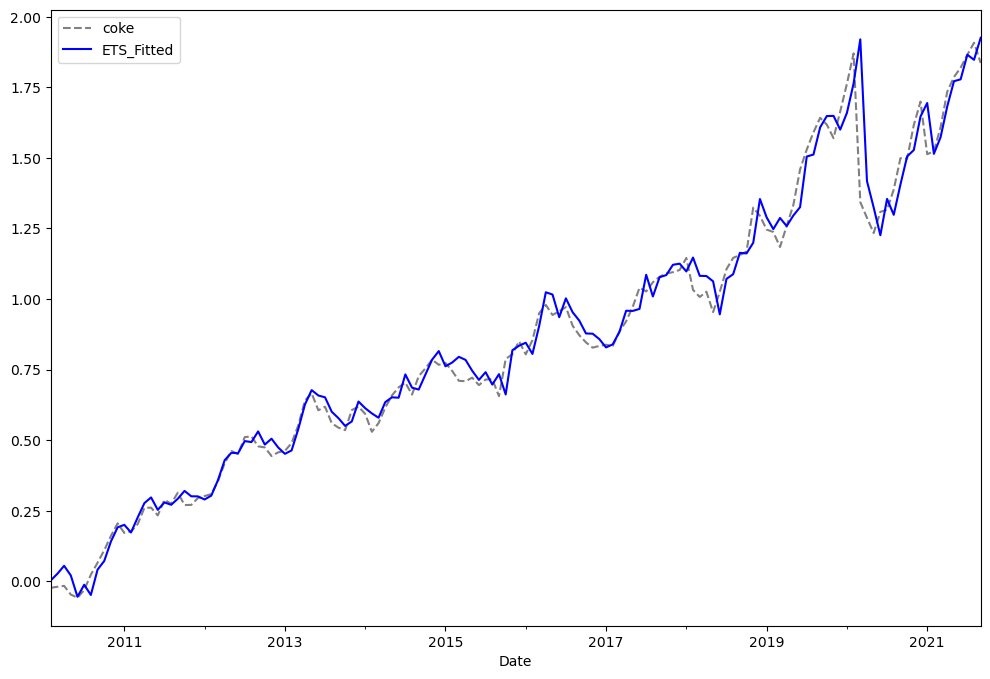

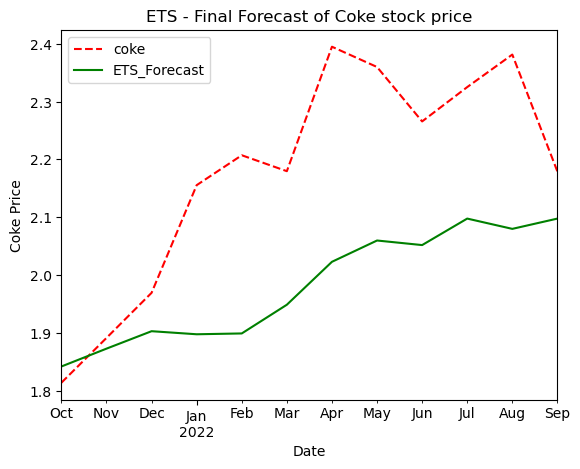

In [134]:
train_coke.plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
ets_model_c.fittedvalues.plot(color="b", legend=True, label="ETS_Fitted")
test_coke.plot(style="--",color="r", legend=True, label="Test")
plt.xlabel('Time')
plt.ylabel('Coke Price')
plt.title("ETS - Final Forecast of Coke stock price")
predictions_coke["ETS"].plot(color="g", legend=True, label="ETS_Forecast")

Yet again the ETS model tracks the series well but performs poorly in forecasating the testing set.

In [135]:
ets_model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                   coke   No. Observations:                  140
Model:                   ETS(A, A, A)   Log Likelihood                 170.375
Date:                Thu, 06 Jul 2023   AIC                           -332.751
Time:                        20:39:58   BIC                           -320.984
Sample:                    02-28-2010   HQIC                          -327.969
                         - 09-30-2021   Scale                            0.005
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.043     23.369      0.000       0.916       1.084
smoothing_trend        0.0001      0.008      0.013      0.990      -0.015       0.016
smoothing_seasonal     0.0001      0.044      0.002      0.998      -0.086       0.086
=============================================
             initialization method: heuristic
---------------------------------------------
level                                  0.0306
trend                                  0.0219
seasonal                              -0.0289
seasonal.L1                           -0.0018
seasonal.L2                           -0.0101
seasonal.L3                           -0.0192
seasonal.L4                           -0.0034
seasonal.L5                            0.0006
seasonal.L6                            0.0402
seasonal.L7                            0.0162
seasonal.L8                            0.0460
seasonal.L9                            0.0310
seasonal.L10                          -0.0214
seasonal.L11                          -0.0493
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):              4571.63
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):              12.69   Skew:                            -3.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
#holt-winters
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [137]:
hw_model_p = HWES(train_pepsi, seasonal_periods=12, trend='add', seasonal='mul')
hw_fitted_p = hw_model_p.fit()

In [138]:
print(hw_fitted_p.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    pepsi   No. Observations:                  140
Model:             ExponentialSmoothing   SSE                              0.580
Optimized:                         True   AIC                           -736.018
Trend:                         Additive   BIC                           -688.952
Seasonal:                Multiplicative   AICC                          -730.365
Seasonal Periods:                    12   Date:                 Thu, 06 Jul 2023
Box-Cox:                          False   Time:                         20:39:58
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

In [139]:
sales_forecast_p = hw_fitted_p.forecast(steps=12)

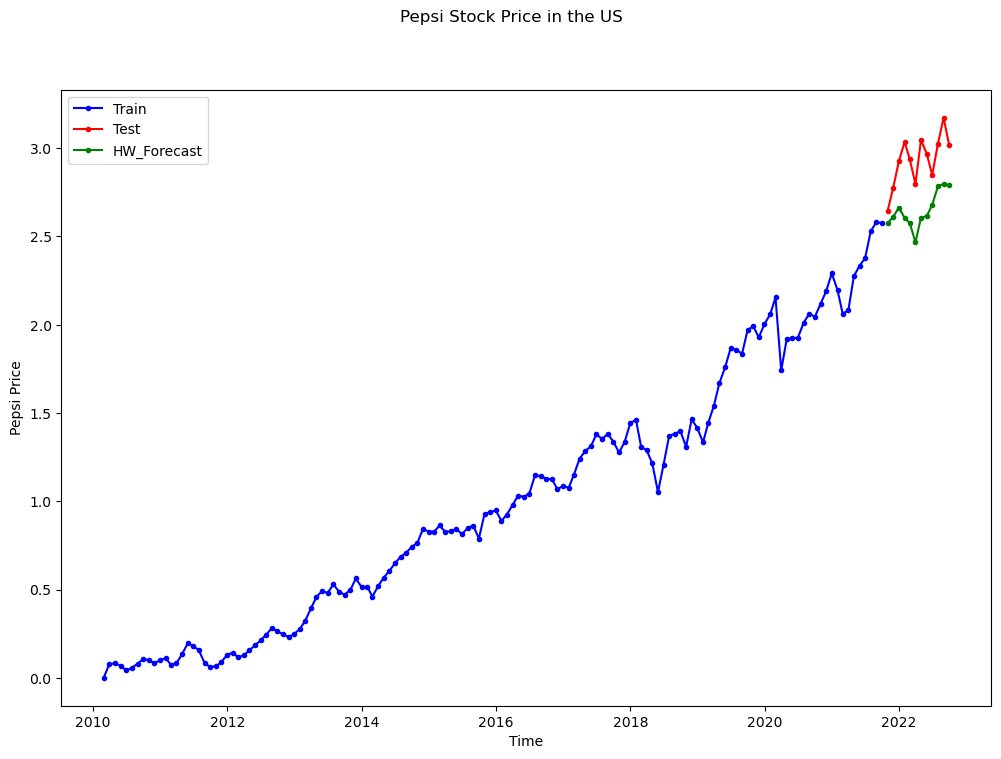

In [140]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Pepsi Stock Price in the US')
past, = plt.plot(train_pepsi.index, train_pepsi, 'b.-', label='Train')
future, = plt.plot(test_pepsi.index, test_pepsi, 'r.-', label='Test')
predicted_future_p, = plt.plot(test_pepsi.index, sales_forecast_p, 'g.-', label='HW_Forecast')
plt.legend(handles=[past, future, predicted_future_p])
plt.xlabel('Time')
plt.ylabel('Pepsi Price')
plt.show()

Holt winters suffers from similar issues as the ETS model, which is underfitting the testing set.

In [141]:
hw_model_c = HWES(train_coke, seasonal_periods=12, trend='add', seasonal='add')
hw_fitted_c = hw_model_c.fit()


In [142]:
print(hw_fitted_c.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     coke   No. Observations:                  140
Model:             ExponentialSmoothing   SSE                              0.612
Optimized:                         True   AIC                           -728.617
Trend:                         Additive   BIC                           -681.551
Seasonal:                      Additive   AICC                          -722.964
Seasonal Periods:                    12   Date:                 Thu, 06 Jul 2023
Box-Cox:                          False   Time:                         20:39:58
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

In [143]:
sales_forecast_c = hw_fitted_c.forecast(steps=12)

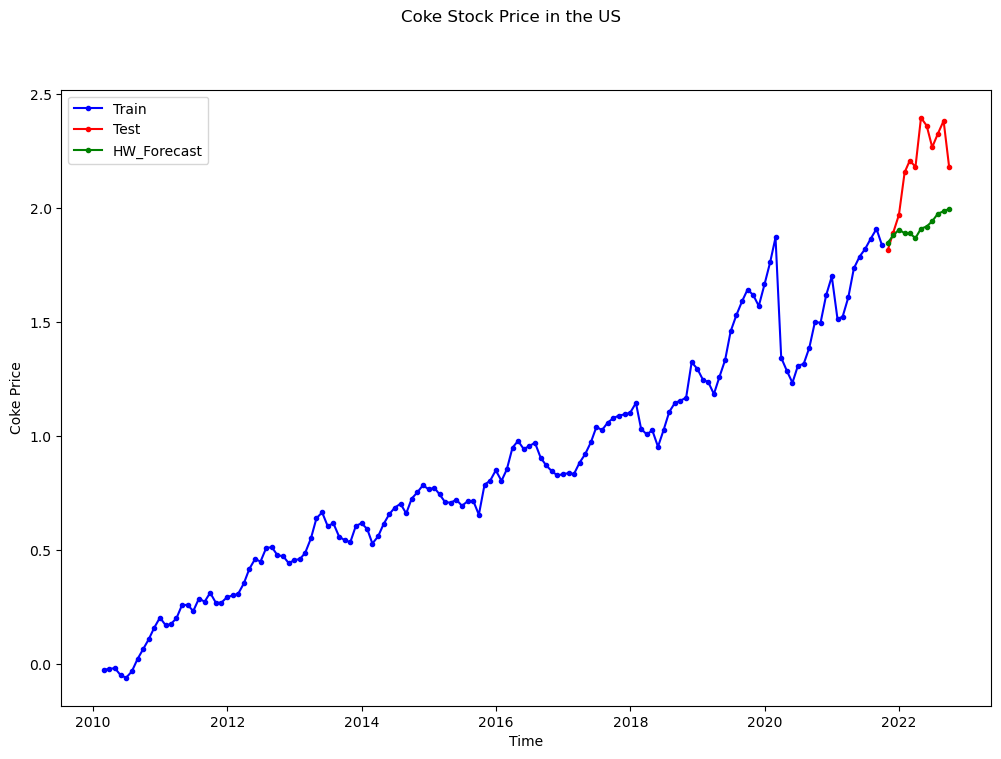

In [144]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Coke Stock Price in the US')
past, = plt.plot(train_coke.index, train_coke, 'b.-', label='Train')
future, = plt.plot(test_coke.index, test_coke, 'r.-', label='Test')
predicted_future_c, = plt.plot(test_coke.index, sales_forecast_c, 'g.-', label='HW_Forecast')
plt.legend(handles=[past, future, predicted_future_c])
plt.xlabel('Time')
plt.ylabel('Coke Price')
plt.show()

Same issue as above, the forecast is underfit.

In [145]:
##MAPE of pepsi

In [146]:
#SARIMA PEPSI
forecast = model2_fit.forecast(12)
print(forecast)

2022-10-31 00:00:00-04:00    3.028175
2022-11-30 00:00:00-05:00    3.054846
2022-12-31 00:00:00-05:00    3.088637
2023-01-31 00:00:00-05:00    3.090256
2023-02-28 00:00:00-05:00    3.068971
2023-03-31 00:00:00-04:00    3.027207
2023-04-30 00:00:00-04:00    3.096303
2023-05-31 00:00:00-04:00    3.088161
2023-06-30 00:00:00-04:00    3.084962
2023-07-31 00:00:00-04:00    3.134258
2023-08-31 00:00:00-04:00    3.159540
2023-09-30 00:00:00-04:00    3.137324
Freq: M, Name: predicted_mean, dtype: float64


In [147]:

fcast = model2_fit.get_forecast(12)
print(fcast.conf_int())

                           lower pepsi  upper pepsi
2022-10-31 00:00:00-04:00     2.873003     3.183348
2022-11-30 00:00:00-05:00     2.835724     3.273968
2022-12-31 00:00:00-05:00     2.820665     3.356609
2023-01-31 00:00:00-05:00     2.781285     3.399226
2023-02-28 00:00:00-05:00     2.724041     3.413901
2023-03-31 00:00:00-04:00     2.649913     3.404502
2023-04-30 00:00:00-04:00     2.689379     3.503228
2023-05-31 00:00:00-04:00     2.653780     3.522542
2023-06-30 00:00:00-04:00     2.624908     3.545015
2023-07-31 00:00:00-04:00     2.650031     3.618485
2023-08-31 00:00:00-04:00     2.652423     3.666657
2023-09-30 00:00:00-04:00     2.608433     3.666214


In [148]:
def forecast_accuracy(forecast, actual):
    if len(forecast) != len(actual):
        actual = actual[:len(forecast)]
    forecast = np.array(forecast) # convert forecast to a Numpy array
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'mae': mae, 'rmse':rmse})

forecast_accuracy(fcast.predicted_mean, pepsi.values)

{'mape': 185.76395595041822,
 'mae': 3.0115592420661157,
 'rmse': 3.011963308136655}

In [149]:
#ETS PEPSI
fc_model_p = ets_model_p.forecast(12)
print(fc_model_p);
fcastp = ets_model_p.get_forecast(12)
print(fcastp.conf_int());

2021-10-31 00:00:00-04:00    2.586853
2021-11-30 00:00:00-05:00    2.615658
2021-12-31 00:00:00-05:00    2.636810
2022-01-31 00:00:00-05:00    2.642069
2022-02-28 00:00:00-05:00    2.646706
2022-03-31 00:00:00-04:00    2.672114
2022-04-30 00:00:00-04:00    2.752326
2022-05-31 00:00:00-04:00    2.784112
2022-06-30 00:00:00-04:00    2.821654
2022-07-31 00:00:00-04:00    2.860163
2022-08-31 00:00:00-04:00    2.850631
2022-09-30 00:00:00-04:00    2.846213
Freq: M, Name: predicted_mean, dtype: float64
                           lower pepsi  upper pepsi
2021-10-31 00:00:00-04:00     2.447376     2.726330
2021-11-30 00:00:00-05:00     2.427267     2.804049
2021-12-31 00:00:00-05:00     2.408529     2.865091
2022-01-31 00:00:00-05:00     2.378768     2.905370
2022-02-28 00:00:00-05:00     2.351499     2.941913
2022-03-31 00:00:00-04:00     2.347180     2.997048
2022-04-30 00:00:00-04:00     2.399278     3.105374
2022-05-31 00:00:00-04:00     2.404192     3.164031
2022-06-30 00:00:00-04:00     

In [150]:
forecast_accuracy(fcastp.predicted_mean, pepsi.values)

{'mape': 163.87492439561697,
 'mae': 2.6496149565946565,
 'rmse': 2.651621209631803}

In [151]:
#HW PEPSI
def forecast_accuracy(forecast, actual):
    if len(forecast) != len(actual):
        actual = actual[:len(forecast)]
    forecast = np.array(forecast)  # convert forecast to a Numpy array
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))  # MAE
    rmse = np.mean((forecast - actual) ** 2) ** 0.5  # RMSE
    return {'mape': mape, 'mae': mae, 'rmse': rmse}
forecast = hw_fitted_p.forecast(len(test_pepsi))
forecast_accuracy(forecast, pepsi.values)

{'mape': 159.0992355003702,
 'mae': 2.5706469446706697,
 'rmse': 2.5726326272974203}

The Holt-Winters model has the lowest MAPE, which may indicate that it is the best, though it is still above 5 which is not ideal.

In [152]:
##MAPE of Coke

In [153]:
#SARIMA Coke 
forecast = model1_fit.forecast(12)
print(forecast)

2022-10-31 00:00:00-04:00    2.175479
2022-11-30 00:00:00-05:00    2.181014
2022-12-31 00:00:00-05:00    2.185842
2023-01-31 00:00:00-05:00    2.186535
2023-02-28 00:00:00-05:00    2.186944
2023-03-31 00:00:00-04:00    2.173776
2023-04-30 00:00:00-04:00    2.184856
2023-05-31 00:00:00-04:00    2.181516
2023-06-30 00:00:00-04:00    2.180244
2023-07-31 00:00:00-04:00    2.183576
2023-08-31 00:00:00-04:00    2.186868
2023-09-30 00:00:00-04:00    2.176227
Freq: M, Name: predicted_mean, dtype: float64


In [154]:
fcast = model1_fit.get_forecast(12)
print(fcast.conf_int())

                           lower coke  upper coke
2022-10-31 00:00:00-04:00    2.030112    2.320847
2022-11-30 00:00:00-05:00    1.975733    2.386295
2022-12-31 00:00:00-05:00    1.934791    2.436893
2023-01-31 00:00:00-05:00    1.897068    2.476003
2023-02-28 00:00:00-05:00    1.863779    2.510108
2023-03-31 00:00:00-04:00    1.820280    2.527272
2023-04-30 00:00:00-04:00    1.803590    2.566122
2023-05-31 00:00:00-04:00    1.774515    2.588516
2023-06-30 00:00:00-04:00    1.749179    2.611309
2023-07-31 00:00:00-04:00    1.729850    2.637302
2023-08-31 00:00:00-04:00    1.711683    2.662053
2023-09-30 00:00:00-04:00    1.680628    2.671825


In [155]:
def forecast_accuracy(forecast, actual):
    if len(forecast) != len(actual):
        actual = actual[:len(forecast)]
    forecast = np.array(forecast) # convert forecast to a Numpy array
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'mae': mae, 'rmse':rmse})

forecast_accuracy(fcast.predicted_mean, coke.values)

{'mape': 56.988672179959586,
 'mae': 2.1364788407658266,
 'rmse': 2.1383860047252226}

In [156]:
#ETS Coke
fc_model_c = ets_model_c.forecast(12)
print(fc_model_c);
fcastc = ets_model_c.get_forecast(12)
print(fcastc.conf_int());

2021-10-31 00:00:00-04:00    1.842220
2021-11-30 00:00:00-05:00    1.873069
2021-12-31 00:00:00-05:00    1.903212
2022-01-31 00:00:00-05:00    1.897911
2022-02-28 00:00:00-05:00    1.899335
2022-03-31 00:00:00-04:00    1.948975
2022-04-30 00:00:00-04:00    2.023155
2022-05-31 00:00:00-04:00    2.059953
2022-06-30 00:00:00-04:00    2.052072
2022-07-31 00:00:00-04:00    2.097861
2022-08-31 00:00:00-04:00    2.080081
2022-09-30 00:00:00-04:00    2.097839
Freq: M, Name: predicted_mean, dtype: float64
                           lower coke  upper coke
2021-10-31 00:00:00-04:00    1.701781    1.982660
2021-11-30 00:00:00-05:00    1.674458    2.071681
2021-12-31 00:00:00-05:00    1.659956    2.146469
2022-01-31 00:00:00-05:00    1.617011    2.178810
2022-02-28 00:00:00-05:00    1.585265    2.213404
2022-03-31 00:00:00-04:00    1.604912    2.293037
2022-04-30 00:00:00-04:00    1.651508    2.394802
2022-05-31 00:00:00-04:00    1.662626    2.457280
2022-06-30 00:00:00-04:00    1.630623    2.47352

In [157]:
forecast_accuracy(fcastc.predicted_mean, coke.values)

{'mape': 51.74926403521617,
 'mae': 1.9358793621196402,
 'rmse': 1.9401650185225923}

In [158]:
#HW Coke
def forecast_accuracy(forecast, actual):
    if len(forecast) != len(actual):
        actual = actual[:len(forecast)]
    forecast = np.array(forecast)  # convert forecast to a Numpy array
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))  # MAE
    rmse = np.mean((forecast - actual) ** 2) ** 0.5  # RMSE
    return {'mape': mape, 'mae': mae, 'rmse': rmse}

forecast = hw_fitted_c.forecast(len(test_coke))
forecast_accuracy(forecast, coke.values)

{'mape': 50.061390867186304,
 'mae': 1.8712563229950065,
 'rmse': 1.8739909925998304}

### The Holt-Winter model for coke  and pepsi  has the best MAPE which is an indication the model is acceptably accurate.

### We could also use Prophet and LSTM to forecast values of coke and pepsi with better accuracy using R. 

In [159]:
#VAR

In [43]:
data = pd.merge_asof(coke,pepsi,left_index = True, right_index = True)
data = data.dropna() 
data = data.rename(columns={'return_x': 'coke', 'return_y': 'pepsi'})
data.head()

,coke,pepsi
Date,,
2010-02-28 00:00:00-05:00,-0.022865,0.001713
2010-03-31 00:00:00-04:00,-0.019149,0.078560
2010-04-30 00:00:00-04:00,-0.015938,0.083173
2010-05-31 00:00:00-04:00,-0.046757,0.069256
2010-06-30 00:00:00-04:00,-0.057967,0.043476


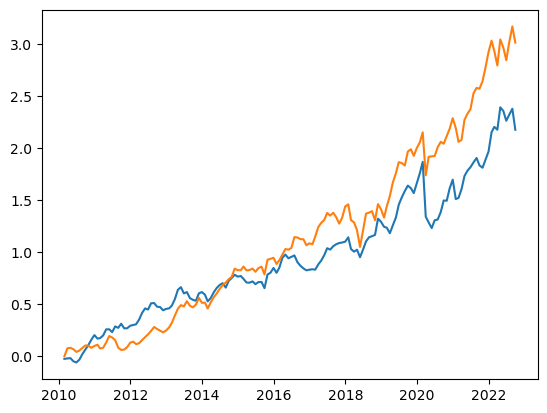

In [44]:
plt.plot(data)
plt.show()

First, we check for granger causality on the base series to make sure this is a good pair of series to analyze

In [45]:
results = VAR(data[['coke', 'pepsi']]).fit(maxlags = 15, ic = 'aic')

In [46]:
#coke cause pepsi?
results.test_causality('coke','pepsi', kind='f').summary()

Test statistic,Critical value,p-value,df
4.345,2.247,0.001,"(5, 272)"


In [47]:
#pepsi cause coke?
results.test_causality('pepsi','coke', kind='f').summary()

Test statistic,Critical value,p-value,df
0.7845,2.247,0.562,"(5, 272)"


In this case, pepsi does cause coke at the price level series but coke not does influence the price of pepsi.

Now we need to check of the series are stationary, for which we can use the adfuller.

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(data.coke, regression='ct')

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Define significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("The time series is stationary (reject the null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis)")


The time series is non-stationary (fail to reject the null hypothesis)


In [50]:


# Perform ADF test
result = adfuller(data.pepsi, regression='ct')

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Define significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("The time series is stationary (reject the null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis)")


The time series is non-stationary (fail to reject the null hypothesis)


Both series are non stationary and are co integrated hence do not require differencing. 

Below we autofit a VAR function on the data

In [51]:
# Auto-fit a model for coke and pepsi
var1 = VAR(data[['coke', 'pepsi']]).fit(maxlags = 15, ic = 'aic')

var1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Jul, 2023
Time:                     23:38:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.8363
Nobs:                     147.000    HQIC:                  -11.1020
Log likelihood:           434.192    FPE:                1.25820e-05
AIC:                     -11.2838    Det(Omega_mle):     1.08911e-05
--------------------------------------------------------------------
Results for equation coke
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.047166         0.016441            2.869           0.004
L1.coke          1.089108         0.134938            8.071           0.000
L1.pepsi        -0.134054         0.123975           -1.081           0.280
L2.co

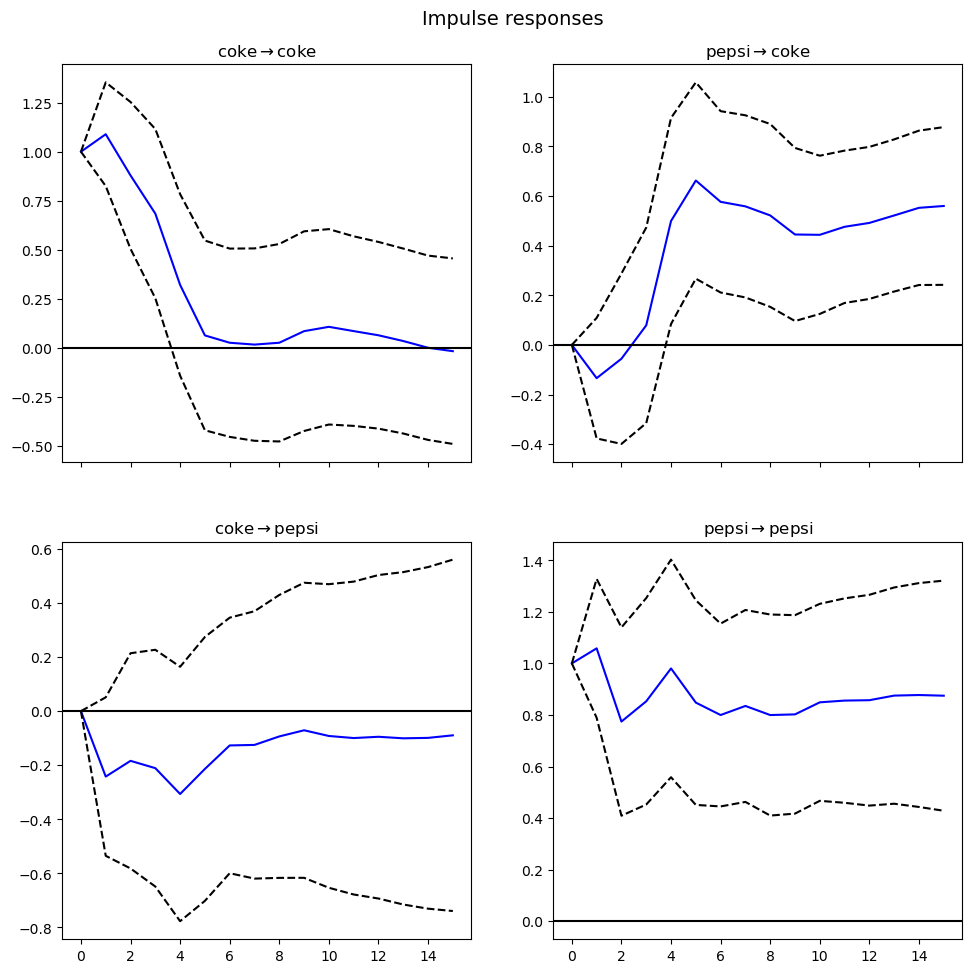

In [52]:
# IRFs
irf = var1.irf(15)
irf.plot(orth=False) # Plots all of them
plt.show()

In [53]:
var1.forecast(var1.endog, steps = 12)

array([[2.15274278, 3.08019252],
       [2.22308598, 3.18119471],
       [2.28914999, 3.20890231],
       [2.30497017, 3.24068109],
       [2.34641468, 3.29314249],
       [2.38855654, 3.32215472],
       [2.40434895, 3.35384437],
       [2.42598365, 3.40084164],
       [2.45203374, 3.44010172],
       [2.47112394, 3.47816491],
       [2.49545486, 3.52349534],
       [2.52553076, 3.56638581]])

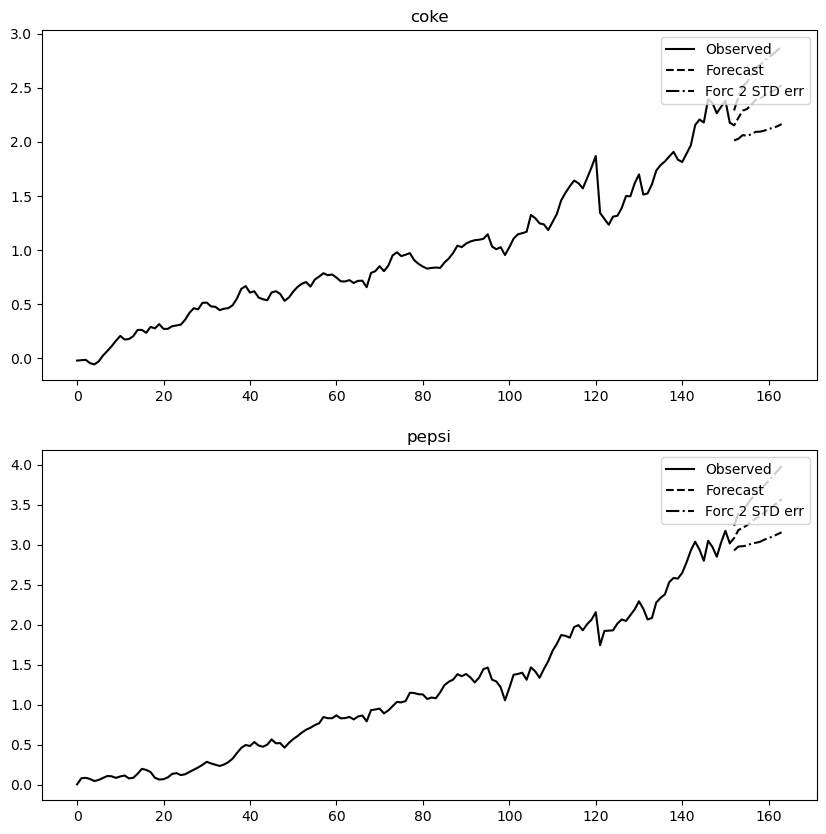

In [54]:
# function to plot forecasts
var1.plot_forecast(12)
plt.show()

In [55]:
#(o) Lastly, plot the FEVD and discuss the results.

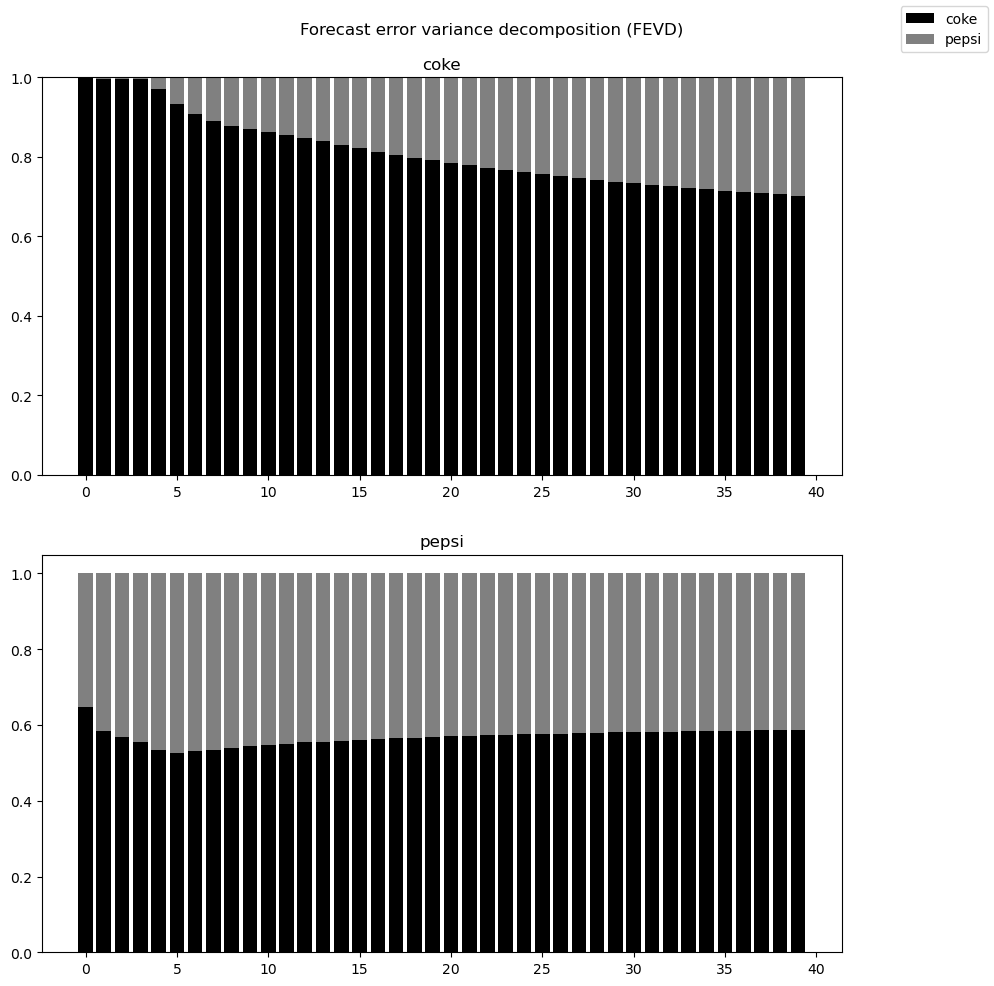

In [56]:
var1.fevd(40).plot()
plt.show()

### Modelling Volatility 

In [175]:
from arch import arch_model

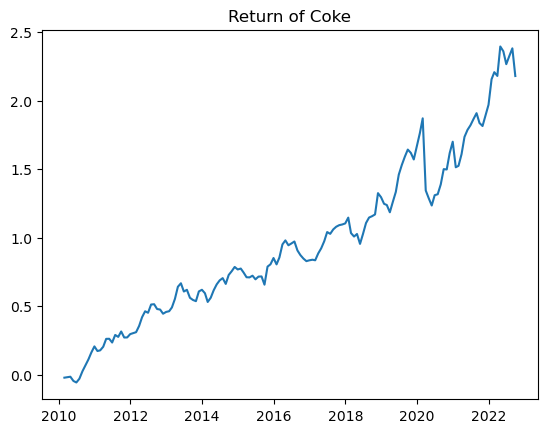

In [176]:
plt.plot(coke)
plt.title('Return of Coke')
plt.show()

In [177]:
## ARCH

In [178]:
am = arch_model(coke , mean='AR', vol='ARCH', p=7, lags = 1)
ARCH = am.fit(update_freq=20)
ARCH

Optimization terminated successfully    (Exit mode 0)
            Current function value: -210.13107520518452
            Iterations: 17
            Function evaluations: 213
            Gradient evaluations: 17


/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005332. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                           AR - ARCH Model Results                            
Dep. Variable:                   coke   R-squared:                       0.983
Mean Model:                        AR   Adj. R-squared:                  0.983
Vol Model:                       ARCH   Log-Likelihood:                210.131
Distribution:                  Normal   AIC:                          -400.262
Method:            Maximum Likelihood   BIC:                          -370.089
                                        No. Observations:                  151
Date:                Thu, Jul 06 2023   Df Residuals:                      149
Time:                        20:40:00   Df Model:                            2
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0216  6.265e-03      3.440  5.807e-04 [9.

In [179]:
#### GARCH

In [180]:
arima_model_fitted = pm.auto_arima(coke)
p, d, q = arima_model_fitted.order
arima_residuals = arima_model_fitted.arima_res_.resid

In [181]:
arima_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 180.881
Date:                Thu, 06 Jul 2023   AIC                           -357.762
Time:                        20:40:00   BIC                           -351.728
Sample:                    02-28-2010   HQIC                          -355.311
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0146      0.007      1.989      0.047       0.000       0.029
sigma2         0.0053      0.000     22.848      0.000       0.005       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              2461.18
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               9.49   Skew:                            -2.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [182]:
garch = arch_model(arima_residuals, p=1, q=1)
garch_model = garch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3131638.2840233655
Iteration:      2,   Func. Count:     17,   Neg. LLF: 178.9251375778241
Iteration:      3,   Func. Count:     28,   Neg. LLF: -143.37021171829173
Iteration:      4,   Func. Count:     34,   Neg. LLF: -202.45125016971036
Iteration:      5,   Func. Count:     40,   Neg. LLF: -205.257448469456
Iteration:      6,   Func. Count:     45,   Neg. LLF: -205.36881949508995
Iteration:      7,   Func. Count:     50,   Neg. LLF: -205.40451132259318
Iteration:      8,   Func. Count:     55,   Neg. LLF: -205.40604429212235
Iteration:      9,   Func. Count:     60,   Neg. LLF: -205.40652760019975
Iteration:     10,   Func. Count:     65,   Neg. LLF: -205.40660350366494
Iteration:     11,   Func. Count:     70,   Neg. LLF: -205.4066166037346
Iteration:     12,   Func. Count:     74,   Neg. LLF: -205.40661687872858
Optimization terminated successfully    (Exit mode 0)
            Current function value: -205.4066166037346
         

/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.005308. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [183]:
garch_model

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                205.407
Distribution:                  Normal   AIC:                          -402.813
Method:            Maximum Likelihood   BIC:                          -390.718
                                        No. Observations:                  152
Date:                Thu, Jul 06 2023   Df Residuals:                      151
Time:                        20:40:00   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -8.9780e-03  8.194e-03     -1.096      0.

## strategy

In [57]:
data

,coke,pepsi
Date,,
2010-02-28 00:00:00-05:00,-0.022865,0.001713
2010-03-31 00:00:00-04:00,-0.019149,0.078560
2010-04-30 00:00:00-04:00,-0.015938,0.083173
2010-05-31 00:00:00-04:00,-0.046757,0.069256
2010-06-30 00:00:00-04:00,-0.057967,0.043476
...,...,...
2022-05-31 00:00:00-04:00,2.359848,2.969411
2022-06-30 00:00:00-04:00,2.265781,2.847662
2022-07-31 00:00:00-04:00,2.325137,3.024496


In [58]:
### pair trading strategy 

In [67]:
# Calculate the spread
data['Spread'] = data['coke'] - data['pepsi']

# Print the resulting dataframe with the spread
data

,coke,pepsi,Spread
Date,,,
2010-02-28 00:00:00-05:00,-0.022865,0.001713,-0.024579
2010-03-31 00:00:00-04:00,-0.019149,0.078560,-0.097709
2010-04-30 00:00:00-04:00,-0.015938,0.083173,-0.099111
2010-05-31 00:00:00-04:00,-0.046757,0.069256,-0.116014
2010-06-30 00:00:00-04:00,-0.057967,0.043476,-0.101443
...,...,...,...
2022-05-31 00:00:00-04:00,2.359848,2.969411,-0.609563
2022-06-30 00:00:00-04:00,2.265781,2.847662,-0.581881
2022-07-31 00:00:00-04:00,2.325137,3.024496,-0.699359


In [ ]:
data['returns'] =  np.log(interest["DEXUSUK"]).diff()

In [64]:
# specify candidate values for hyperparameters
ks = np.linspace(.01, .99, 10)
zs = np.linspace(.01, 3, 10)
ws = np.arange(5, 30, 5)
hs =  1
import itertools as it
# build a grid with all possible hyperparameters
grid = np.array(np.meshgrid(ks,zs, ws, hs)).T.reshape(-1,4)

grid

array([[1.00000000e-02, 1.00000000e-02, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 3.42222222e-01, 5.00000000e+00, 1.00000000e+00],
       [1.00000000e-02, 6.74444444e-01, 5.00000000e+00, 1.00000000e+00],
       ...,
       [9.90000000e-01, 2.33555556e+00, 2.50000000e+01, 1.00000000e+00],
       [9.90000000e-01, 2.66777778e+00, 2.50000000e+01, 1.00000000e+00],
       [9.90000000e-01, 3.00000000e+00, 2.50000000e+01, 1.00000000e+00]])

In [72]:
import datetime
data['KO_returns'] = np.log(data['coke'] / data['coke'].shift(1))
data['PEP_returns'] = np.log(data['pepsi'] / data['pepsi'].shift(1))


/Users/Dhriti/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
import datetime
import pandas as pd
import numpy as np

# Create an empty DataFrame to store the results
storage = pd.DataFrame(columns=["k", "z", "w", "h", "profits"])

df_copy = data.copy()

for n in range(len(grid)):
    # Each loop, we pull out the values for a new set of hyperparameters from the grid
    k, z, w, h = grid[n]

    # Fit a filter and CI using the next set of parameters
    df_copy["Filter"] = df_copy["Spread"].ewm(alpha=k, adjust=False).mean()
    df_copy["Filter Error"] = df_copy["Spread"] - df_copy["Filter"]
    df_copy["std"] = df_copy["Filter Error"].rolling(int(w)).std()
    df_copy["Upper"] = df_copy["Filter"] + z * df_copy["std"]
    df_copy["Lower"] = df_copy["Filter"] - z * df_copy["std"]
    df_copy["test"] = np.where(df_copy["Filter Error"].abs() > z * df_copy["std"], 1, 0) * np.sign(
        df_copy["Filter Error"])

    # Create vectors where we can store information on signals and when the change is first signaled
    df_copy["test2"] = 0
    df_copy["signal"] = 0

    for j in df_copy.index:
        # If there is a change in the signal, we want to take a position for the next h periods
        if (df_copy.loc[j, "test"] == 1) & (df_copy.shift().loc[j, "test"] != 1):
            df_copy.loc[j:j + datetime.timedelta(hours=h), "signal"] = 1
            df_copy.loc[j, "test2"] = 1
        elif (df_copy.loc[j, "test"] == -1) & (df_copy.shift().loc[j, "test"] != -1):
            df_copy.loc[j:j + datetime.timedelta(hours=h), "signal"] = -1
            df_copy.loc[j, "test2"] = -1
    
    # Calculate the cumulative returns
    df_copy["cumulative_returns"] = np.exp((df_copy["signal"].shift() * df_copy["KO_returns"]).cumsum()) - 1

    # Store the results
    storage = storage.append(
        {"k": k, "z": z, "w": w, "h": h, "profits": df_copy["cumulative_returns"].iloc[-1]}, ignore_index=True)

    # Print to track the progress of the loop (can take a few minutes)
    print(n)

# Print the results DataFrame
print(storage)



/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


0
1
2
3


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


4
5
6
7


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


8
9
10
11


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


12
13
14


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


15
16
17
18


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


19
20
21


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


22
23
24


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


25
26
27
28


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


29
30
31
32


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


33
34
35
36


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


37
38
39


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


40
41
42


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


43
44
45
46


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


47
48
49
50


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


51
52
53


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


54
55
56
57


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


58
59
60


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


61
62
63
64


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


65
66
67


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


68
69
70


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


71
72
73


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


74
75
76


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


77
78
79


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


80
81
82


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


83
84
85


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


86
87
88
89


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


90
91
92


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


93
94
95


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


96
97
98
99


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


100
101
102


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


103
104
105


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


106
107
108
109


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


110
111
112
113


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


114
115
116


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


117
118
119


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


120
121
122


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


123
124
125


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


126
127
128


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


129
130
131


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


132
133
134


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


135
136
137


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


138
139
140
141


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


142
143
144
145


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


146
147
148
149


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


150
151
152
153


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


154
155
156
157


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


158
159
160
161


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


162
163
164
165


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


166
167
168
169


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


170
171
172


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


173
174
175
176


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


177
178
179
180


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


181
182
183


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


184
185
186


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


187
188
189
190


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


191
192
193


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


194
195
196
197


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


198
199
200


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


201
202
203
204


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


205
206
207
208


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


209
210
211
212


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


213
214
215
216


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


217
218
219
220


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


221
222
223


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


224
225
226
227


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


228
229
230
231


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


232
233
234
235


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


236
237
238
239


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


240
241
242
243


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


244
245
246
247


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


248
249
250
251


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


252
253
254
255


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


256
257
258
259


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


260
261
262


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


263
264
265
266


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


267
268
269
270


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


271
272
273
274


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


275
276
277
278


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


279
280
281
282


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


283
284
285
286


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


287
288
289
290


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


291
292
293
294


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


295
296
297
298


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


299
300
301
302


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


303
304
305
306


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


307
308
309
310


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


311
312
313
314


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


315
316
317
318


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


319
320
321
322


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


323
324
325
326


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


327
328
329
330


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


331
332
333
334


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


335
336
337
338


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


339
340
341
342


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


343
344
345
346


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


347
348
349
350


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


351
352
353


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


354
355
356
357


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


358
359
360
361


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


362
363
364


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


365
366
367
368


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


369
370
371


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


372
373
374
375


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


376
377
378
379


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


380
381
382


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


383
384
385
386


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


387
388
389
390


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


391
392
393
394


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


395
396
397
398


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


399
400
401
402


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


403
404
405


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


406
407
408
409


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


410
411
412


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


413
414
415
416


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


417
418
419
420


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


421
422
423
424


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


425
426
427
428


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


429
430
431
432


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


433
434
435
436


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


437
438
439
440


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


441
442
443
444


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


445
446
447
448


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


449
450
451
452


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


453
454
455
456


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


457
458
459
460


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


461
462
463
464


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


465
466
467
468


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


469
470
471
472


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


473
474
475
476


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


477
478
479
480


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


481
482
483
484


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


485
486
487
488


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


489
490
491
492


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


493
494
495
496
497
498
499
        k         z     w    h   profits
0    0.01  0.010000   5.0  1.0  1.949970
1    0.01  0.342222   5.0  1.0  2.008196
2    0.01  0.674444   5.0  1.0  1.861446
3    0.01  1.006667   5.0  1.0  1.218489
4    0.01  1.338889   5.0  1.0  1.271351
..    ...       ...   ...  ...       ...
495  0.99  1.671111  25.0  1.0  0.060656
496  0.99  2.003333  25.0  1.0 -0.124091
497  0.99  2.335556  25.0  1.0  0.018646
498  0.99  2.667778  25.0  1.0  0.018646
499  0.99  3.000000  25.0  1.0  0.000000

[500 rows x 5 columns]


/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(
/var/folders/j8/qj6z29_s2qj2dwzv274nkt9h0000gp/T/ipykernel_36170/3086947398.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append(


In [77]:
storage

,k,z,w,h,profits
0,0.01,0.010000,5.0,1.0,1.949970
1,0.01,0.342222,5.0,1.0,2.008196
2,0.01,0.674444,5.0,1.0,1.861446
3,0.01,1.006667,5.0,1.0,1.218489
4,0.01,1.338889,5.0,1.0,1.271351
...,...,...,...,...,...
495,0.99,1.671111,25.0,1.0,0.060656
496,0.99,2.003333,25.0,1.0,-0.124091
497,0.99,2.335556,25.0,1.0,0.018646
498,0.99,2.667778,25.0,1.0,0.018646


In [76]:
def heatmap(x, y, metric, values):
    
    # specify the columns I will be pulling from the results
    p2p = values[[x, y, metric]]
    
    # If p > 2, we need to group 
    heat = np.round(p2p.groupby([x,y]).max(),1)
    heat = heat.unstack()[metric]

    # round labels
    heat.index = np.round(heat.index,2)
    heat.columns = np.round(heat.columns,2)

    # make plot
    f, ax = plt.subplots(figsize=(25, 12))
    ax = sns.heatmap(heat, fmt='.1g')
    ax.set_title("Heat map of "+ metric,size = 18)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel(y, size = 18)
    ax.set_ylabel(x, size = 18)
    ax.collections[0].colorbar.set_label(metric, size = 18)
    sns.set(font_scale=1)
    plt.show()

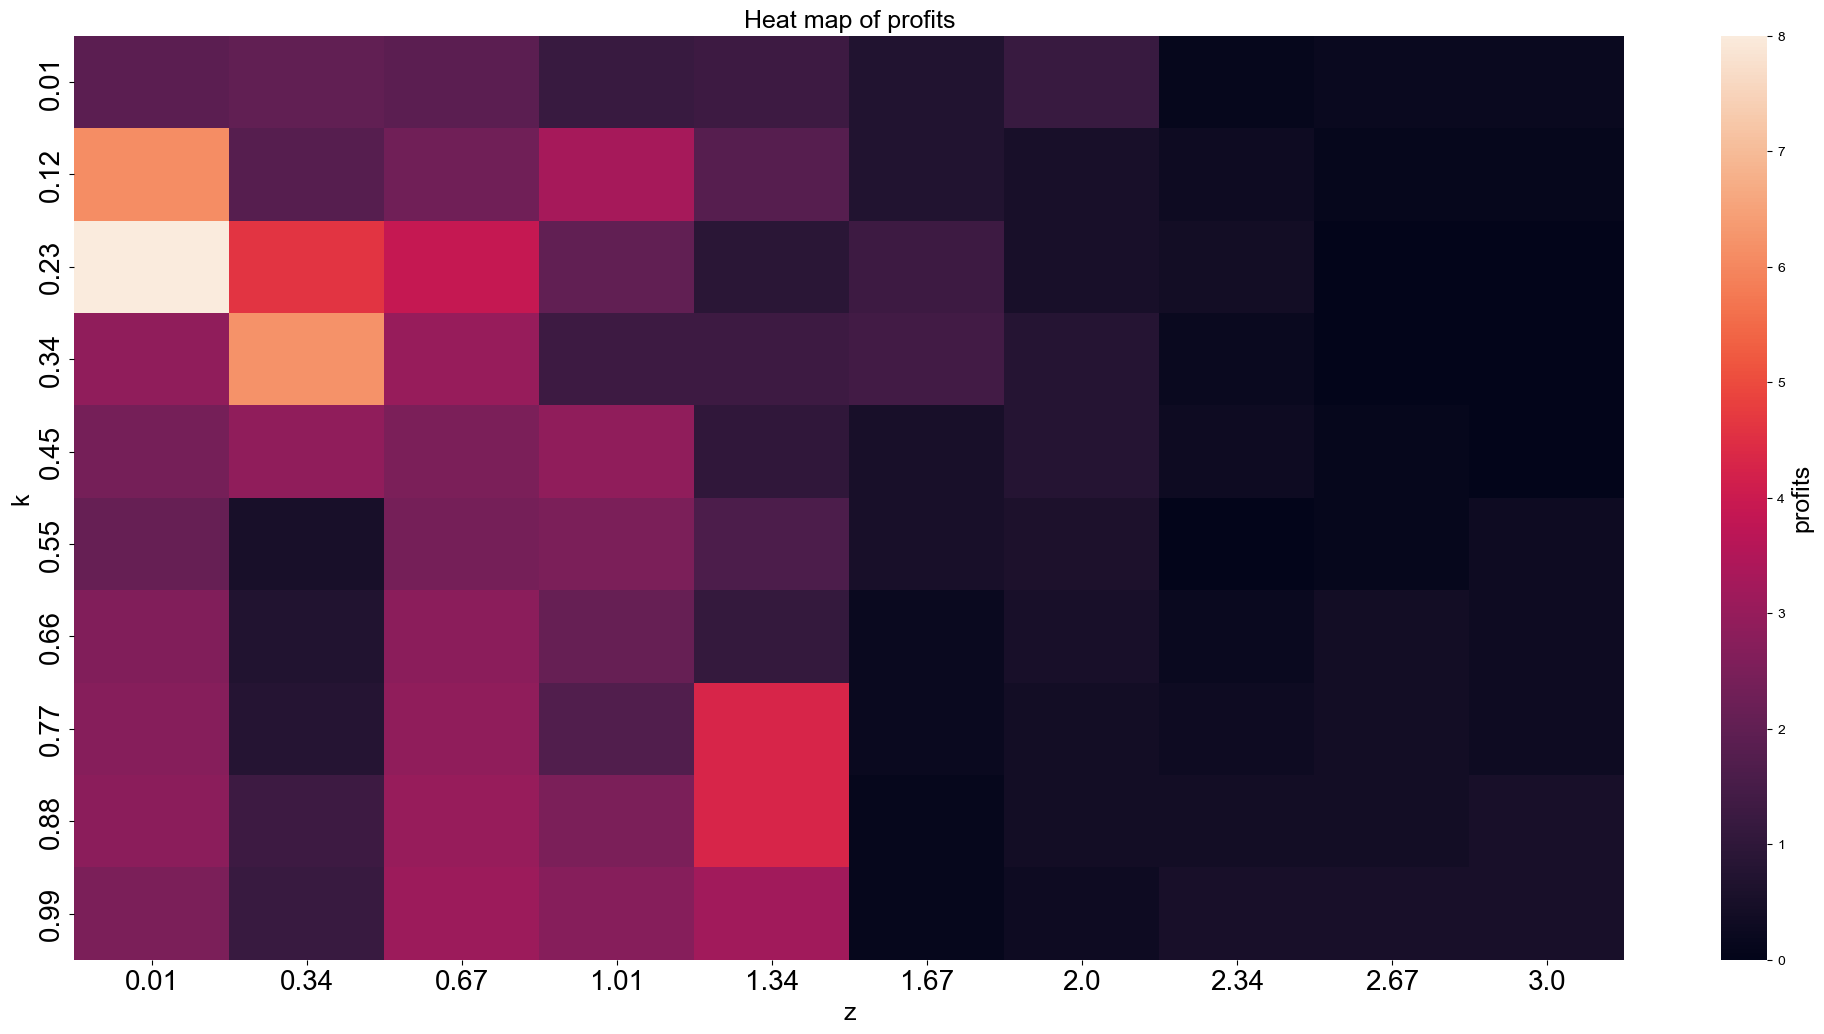

In [78]:
heatmap("k", "z","profits", storage)

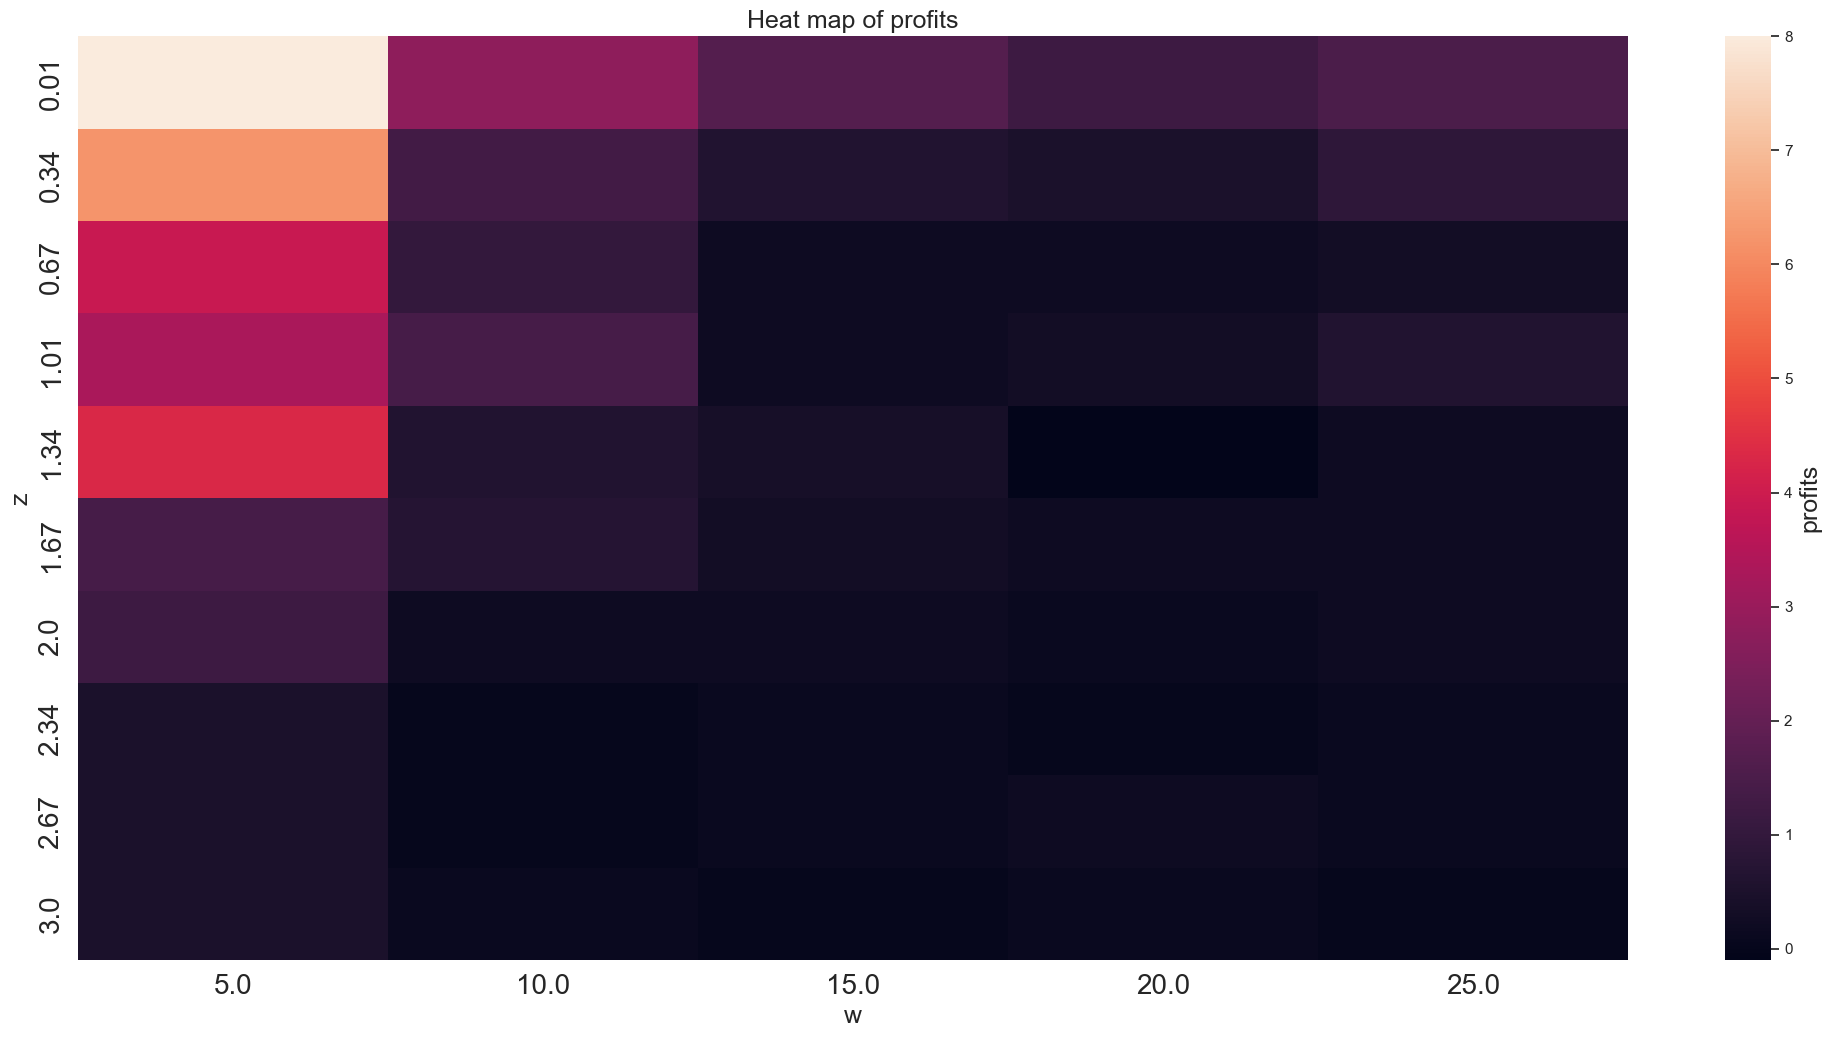

In [79]:
heatmap("z", "w","profits", storage)

In [ ]:
## Choosing parameters after grid search 

In [85]:
df_copy

,coke,pepsi,Spread,KO_returns,PEP_returns,Filter,Filter Error,std,Upper,Lower,test,test2,signal,cumulative_returns
Date,,,,,,,,,,,,,,
2010-02-28 00:00:00-05:00,-0.022865,0.001713,-0.024579,NaN,NaN,-0.024579,0.000000,NaN,NaN,NaN,0.0,0,0,NaN
2010-03-31 00:00:00-04:00,-0.019149,0.078560,-0.097709,-0.177379,3.825416,-0.025310,-0.072399,NaN,NaN,NaN,-0.0,0,0,0.0
2010-04-30 00:00:00-04:00,-0.015938,0.083173,-0.099111,-0.183513,0.057058,-0.026048,-0.073063,NaN,NaN,NaN,-0.0,0,0,0.0
2010-05-31 00:00:00-04:00,-0.046757,0.069256,-0.116014,1.076231,-0.183103,-0.026948,-0.089066,NaN,NaN,NaN,-0.0,0,0,0.0
2010-06-30 00:00:00-04:00,-0.057967,0.043476,-0.101443,0.214914,-0.465607,-0.027693,-0.073751,0.035159,-0.027341,-0.028044,-1.0,-1,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 00:00:00-04:00,2.359848,2.969411,-0.609563,-0.014745,-0.025838,-0.227850,-0.381713,0.118366,-0.226666,-0.229034,-1.0,0,0,0.0
2022-06-30 00:00:00-04:00,2.265781,2.847662,-0.581881,-0.040678,-0.041865,-0.231390,-0.350490,0.062065,-0.230770,-0.232011,-1.0,0,0,0.0
2022-07-31 00:00:00-04:00,2.325137,3.024496,-0.699359,0.025859,0.060246,-0.236070,-0.463289,0.043299,-0.235637,-0.236503,-1.0,0,0,0.0


In [87]:
k,z,w, h =  (0.01,0.01,5.0,1.0)

df_copy["Filter"] = df_copy["Spread"].ewm(alpha = k, adjust = False).mean()
df_copy["Filter Error"] = df_copy["Spread"] -df_copy["Filter"]
df_copy["std"] = df_copy["Filter Error"].rolling(int(w)).std()
df_copy["Upper"] = df_copy["Filter"] + z*df_copy["std"]
df_copy["Lower"] = df_copy["Filter"] - z*df_copy["std"]

df_copy["test"] = np.where(df_copy["Filter Error"].abs()>z*df_copy["std"], 1, 0)*np.sign(df_copy["Filter Error"])

df_copy["test2"] = 0
df_copy["signal"] = 0
for j in df_copy.index:
    if (df_copy.loc[j, "test"] == 1) &  (df_copy.shift().loc[j, "test"] != 1):
        df_copy.loc[j:j+datetime.timedelta(h), "signal"] = 1
        df_copy.loc[j, "test2"] = 1
    elif (df_copy.loc[j, "test"] == -1) &  (df_copy.shift().loc[j, "test"] != -1):
        df_copy.loc[j:j+datetime.timedelta(h), "signal"] =  -1
        df_copy.loc[j, "test2"] = -1
df_copy["cumulative_returns"] = np.exp((df_copy["signal"].shift()*df_copy.KO_returns).cumsum())-1
df_copy["strat_returns"] = df_copy["signal"].shift()*df_copy.KO_returns

In [88]:

# use the best hyperparameters to compute the filter and filter error
k, w, z = best_params
data["Filter"] = data.Spread.ewm(alpha=k, adjust=False).mean()
data["Filter Error"] = data.Spread - data["Filter"]
data["std"] = data["Filter Error"].rolling(w).std()
data["Upper"] = data["Filter"] + z * data["std"]
data["Lower"] = data["Filter"] - z * data["std"]

In [89]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Define the grid of holding periods to test
holding_periods = [10, 20, 40, 60, 100]

# Define the number of splits for time series cross validation
n_splits = 5

# Define the time series cross validation split generator
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define the function to calculate the mean squared error for a given holding period
def calculate_mse(holding_period):
    # Create entry and exit signals based on holding period
    entry_signal = np.where(data["Filter Error"].abs() > z * data["std"], 1, 0)
    exit_signal = np.roll(entry_signal, -holding_period)
    exit_signal[-holding_period:] = 0

    # Calculate the test signal
    test_signal = np.where(entry_signal == 1, np.sign(data["Filter Error"]), 0)
    test_signal = np.where(exit_signal == 1, 0, test_signal)

    # Calculate the returns and the squared returns
    returns = np.cumsum(test_signal * data["Spread"])
    squared_returns = np.square(returns)

    # Calculate the mean squared error
    mse = mean_squared_error(squared_returns, np.zeros_like(squared_returns))

    return mse

# Perform the grid search to find the optimal holding period
best_mse = np.inf
best_holding_period = None
for holding_period in holding_periods:
    mse_list = []
    for train_index, test_index in tscv.split(data):
        train_df = data.iloc[train_index]
        z = 2  # Set the z-score threshold
        mse = calculate_mse(holding_period)
        mse_list.append(mse)
    mean_mse = np.mean(mse_list)
    print(f"Holding period: {holding_period}, Mean squared error: {mean_mse}")
    if mean_mse < best_mse:
        best_mse = mean_mse
        best_holding_period = holding_period

print(f"Best holding period: {best_holding_period}, Best mean squared error: {best_mse}")

Holding period: 10, Mean squared error: 0.5288152033989612
Holding period: 20, Mean squared error: 0.6969718947957799
Holding period: 40, Mean squared error: 0.46713201434467033
Holding period: 60, Mean squared error: 0.46713201434467033
Holding period: 100, Mean squared error: 0.46713201434467033
Best holding period: 40, Best mean squared error: 0.46713201434467033


In [191]:
# Define the holding period based on the grid search results
holding_period = 40

# Create entry and exit signals based on holding period
entry_signal = np.where(data["Filter Error"].abs() > z * data["std"], 1, 0)
exit_signal = np.roll(entry_signal, -holding_period)
exit_signal[-holding_period:] = 0

# Calculate the test signal
test_signal = np.where(entry_signal == 1, np.sign(data["Filter Error"]), 0)
test_signal = np.where(exit_signal == 1, 0, test_signal)

# Add the test signal to the dataframe
data["test"] = test_signal

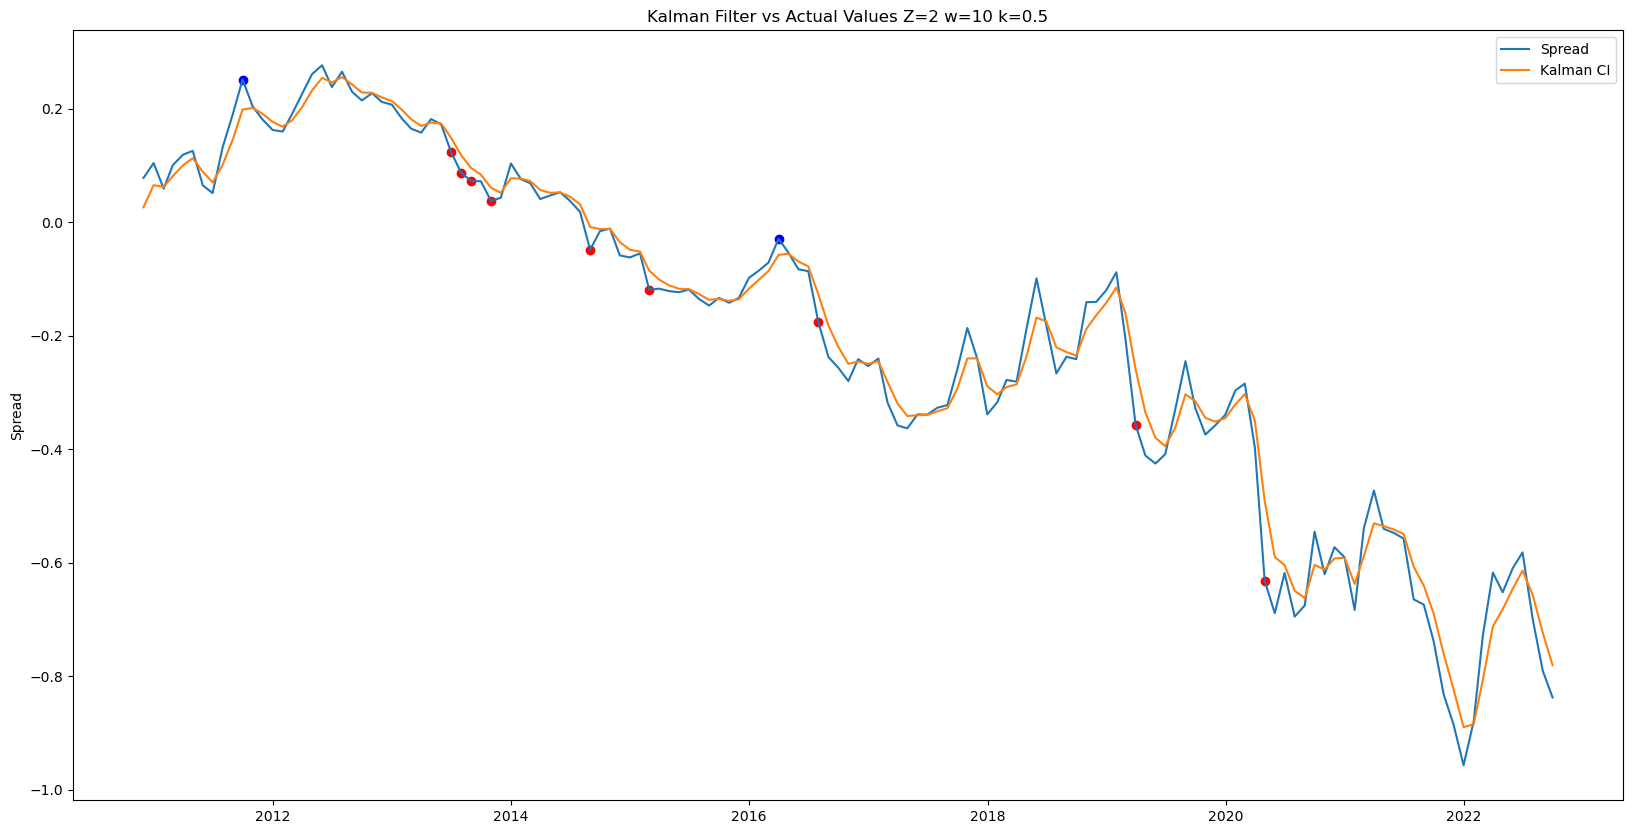

In [192]:
data = data.dropna()
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title("Kalman Filter vs Actual Values " + "Z="+str(z) + " w=" + str(w)+ " k=" + str(k))

ax.set_ylabel("Spread")

# Plot the actual series and the filter
ax.plot(data["Spread"])
ax.plot(data["Filter"])

# add scatterplots using boolean indexing
# We change the colors and shapes based on the conditions
ax.scatter(data[data.test == 1].index, data[data.test == 1]["Spread"], color = "blue")
ax.scatter(data[data.test == -1].index, data[data.test == -1]["Spread"], color = "red")
ax.legend(["Spread", "Kalman CI"])
  

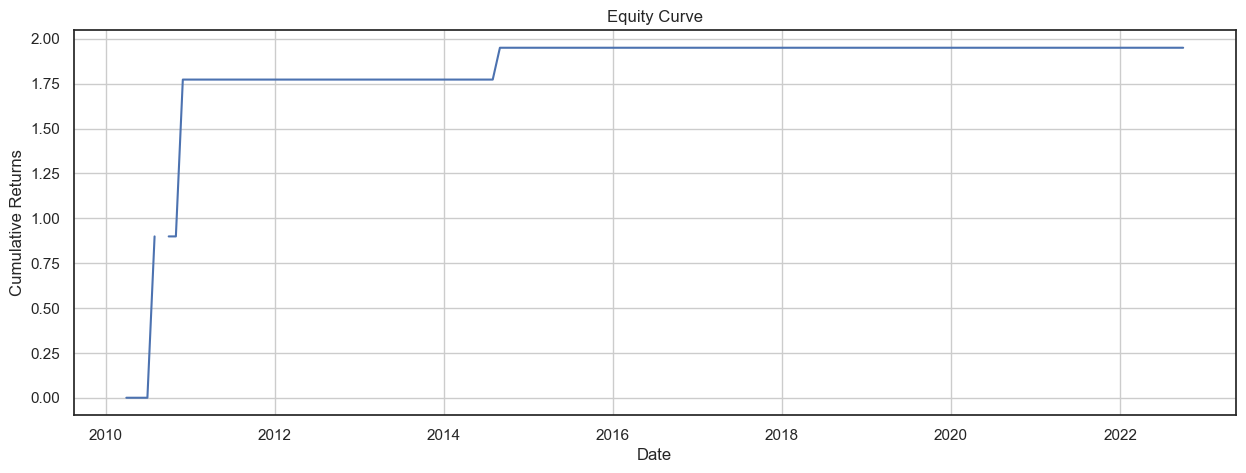

In [101]:
# Plot the equity curve
plt.figure(figsize=(15, 5))
plt.title("Equity Curve")
plt.plot(df_copy["cumulative_returns"])
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.grid()


# CONCLUSIONS AND FUTURE WORK


Forecasting the two time series of the stock prices of pepsi and coke, throughout the process Coke was the easier to forecast. In the autoarima, ETS,  and Holt-Winter Coke had a lower MAPE than the Pepsi forecasts. When we moved to a VAR model we found that Pepsi actually Granger Caused coke, allowing us to further improve on the forecast of coke. It would be interesting for our future work to explore a quant trading strategy using the lags price movement of pepsi and coke. In particular we could use some kind of foreacst combination between Holt Winter and the VAR model, as they each use different underlying data and could provide a benefit to the forecasting accuracy. Another point of future work would be rolling back the differencing to produce a better forecast from the VAR model.